Esse programa será desenvolvido para a primeira prova da disciplina EA616, em maio de 2020.

Professor: José Cláudio Geromel

Aluna: Sara Sousa de Oliveira

RA.: 205733

O Ministério da Saúde do Brasil fornece dados a respeito da infecção produzida pelo coronavírus, em particular, o número total de infectados $d_m(k)$ em cada dia, a partir de 26 / 02 / 2020, considerado o dia inicial $k = 0$. Nosso interesse é testar modelos matemáticos que tentam determinar o número de infectados em relação ao tempo, durante toda a duração da
pandemia.

### Prova 1 : 
Estabelecer o modelo em tempo contínuo, baseado na
”Função Logística”, para a evolução do número de infectados em relação ao tempo. Com os dados reais disponíveis até o momento, estime os parâmetros do modelo. Simule e compare. Os erros observados permitem alguma conclusão sobre o desenvolvimento futuro da pandemia.

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid_br.csv', sep=';')
df.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [3]:
df.groupby(['estado']).head(10)
df.groupby(['estado']).get_group('RO')   # Pega todas as linhas de um só estado.
df_hoje = df.groupby('estado').last()              # Pega ultima linha de cada estado.
df_hoje

,regiao,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
estado,,,,,,
AC,Norte,2020-04-28,32,311,2,16
AL,Nordeste,2020-04-28,134,777,2,36
AM,Norte,2020-04-28,409,4337,31,351
AP,Norte,2020-04-28,76,918,2,28
BA,Nordeste,2020-04-28,186,2540,10,86
CE,Nordeste,2020-04-28,192,6918,13,403
DF,Centro-Oeste,2020-04-28,67,1213,1,28
ES,Sudeste,2020-04-28,78,1874,7,64
GO,Centro-Oeste,2020-04-28,45,661,1,27


In [4]:
df_hoje.loc['SP',:]

regiao                 Sudeste
data                2020-04-28
casosNovos                2345
casosAcumulados          24041
obitosNovos                224
obitosAcumulados          2049
Name: SP, dtype: object

In [5]:
# Deixar a base pronta para plotar (casos por dia)
df_t = df.groupby('data').sum()              # Em cada dia pego a soma de todos os casos.
df_t

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
data,,,,
2020-01-30,0,0,0,0
2020-01-31,0,0,0,0
2020-02-01,0,0,0,0
2020-02-02,0,0,0,0
2020-02-03,0,0,0,0
2020-02-04,0,0,0,0
2020-02-05,0,0,0,0
2020-02-06,0,0,0,0
2020-02-07,0,0,0,0


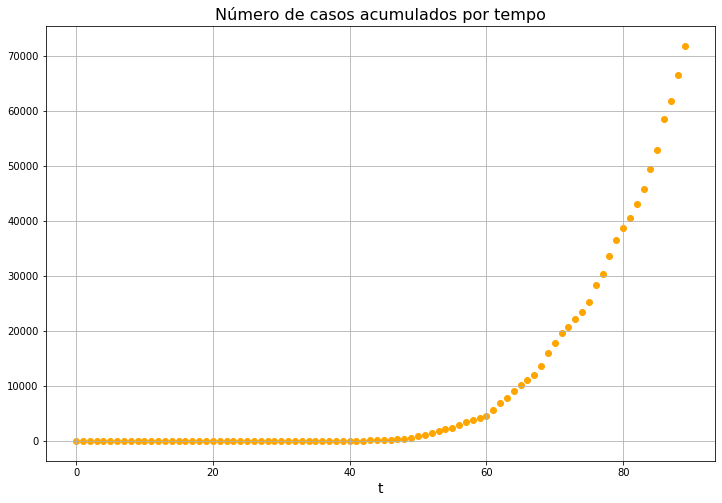

In [6]:
plt.scatter(range(0, 90, 1), df_t.loc[:,'casosAcumulados'], color='orange')
plt.grid()
plt.xlabel('t', size = 14)
plt.title('Número de casos acumulados por tempo', fontsize=16)
plt.gcf().set_size_inches(12, 8)
plt.show()

## Função Logística
#### expit(x) = 1/(1+exp(-x))

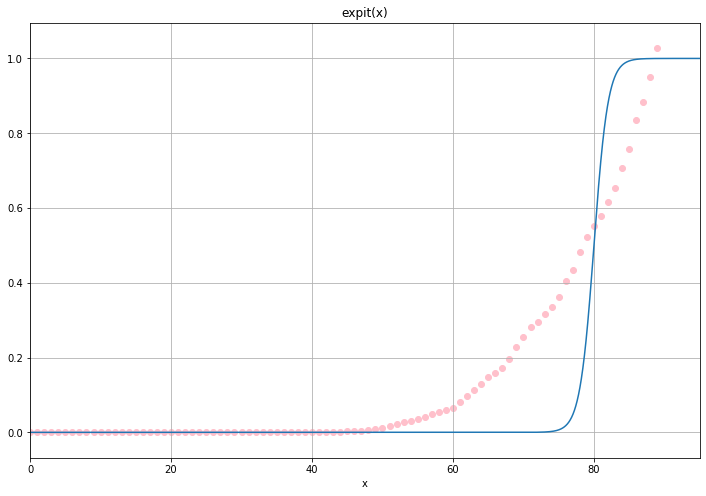

In [7]:
x = np.linspace(-90, 90, 10000)
y = expit(x)
plt.plot(x+80, y)    # Fiz deslocamento +10.
plt.scatter(range(0, 90, 1), df_t.loc[:,'casosAcumulados']/70000, color='pink')
plt.grid()
plt.xlim(0, 95)
#plt.ylim(-1, 1)
plt.xlabel('x')
plt.title('expit(x)')
plt.gcf().set_size_inches(12, 8)
plt.show()

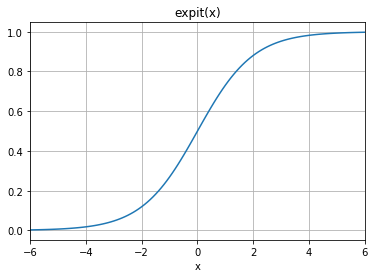

In [8]:
x = np.linspace(-6, 6, 121)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()